<a href="https://colab.research.google.com/github/stymgupta/SVM/blob/main/Minor4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title- Build an SVM Classifier from Scratch**

The Datset pick out on random basis. I took the dataset from kaggle which is based on Social Networking Ads, that is a categorical dataset to determine whether a user purchased a particular product.

Datset:- https://drive.google.com/file/d/1CkbE0mMFGvTzqRdkHyzcAtom7RSVHgqJ/view?usp=sharing

## **Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(kernel='linear')

## **Reading the dataset**

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## **Checking Null Values**

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is no empty values found.

## **Take Age, Estimated Salary and Purchased columns(Numerical Columns)**

In [4]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:, -1].values
print(x[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [5]:
print(y[0:5])

[0 0 0 0 0]


## **Splitting the Dataset**

In [7]:
#splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.29, random_state =0)
print('Training Data', x_train.shape)

Training Data (284, 2)


## **Perform Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [10]:
print(x_train[0:5])

[[ 0.69552659  1.76261186]
 [-0.68098597  0.54767778]
 [ 0.79384892  0.34518877]
 [ 0.89217124 -0.55154829]
 [-1.1725976  -1.59292036]]


In [11]:
print(x_test[0:5])

[[-0.77930829  0.48982378]
 [ 0.00727031 -0.5804753 ]
 [-0.28769666  0.14269975]
 [-0.77930829  0.25840776]
 [-0.28769666 -0.5804753 ]]


## **Fitting Classifier to the Training Set**

In [12]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
#Predicting the test set result
y_predict = classifier.predict(x_test)
print(y_predict[0:5])

[0 0 0 0 0]


## **Making the Conusion Matrix and score**

[[74  3]
 [12 27]]


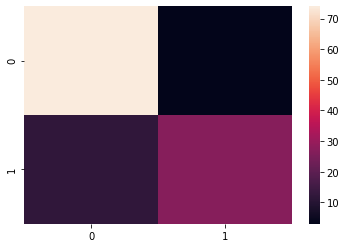

In [26]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm);

In [27]:
#Accuracy score
accuracy_score(y_test, y_predict)

0.8706896551724138

## **Visualizing the traning set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


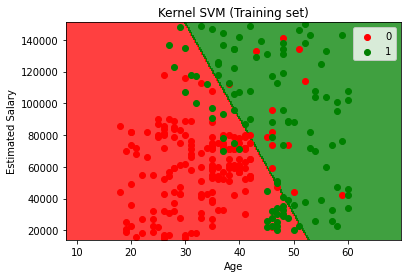

In [28]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## **Visualizing the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


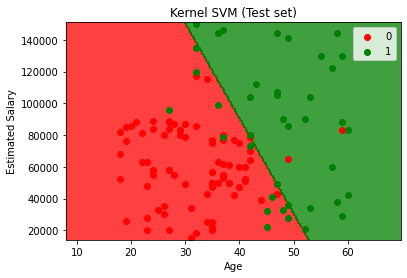

In [29]:
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## **Conclusion**



*   The SVM algorithm is not suitable for large data sets.
*   SVM does not work very well when the dataset has more noise.
*   In cases where the number of entities for each data point exceeds the number of training data samples, the SVM will perform poorly.



